# Knapsack problem

<div>
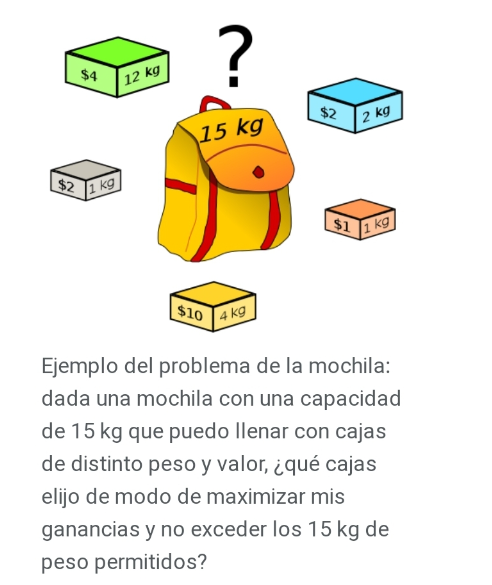
</div>

https://es.wikipedia.org/wiki/Problema_de_la_mochila

# Algoritmo genético (Algoritmos heurísticos)

<div>
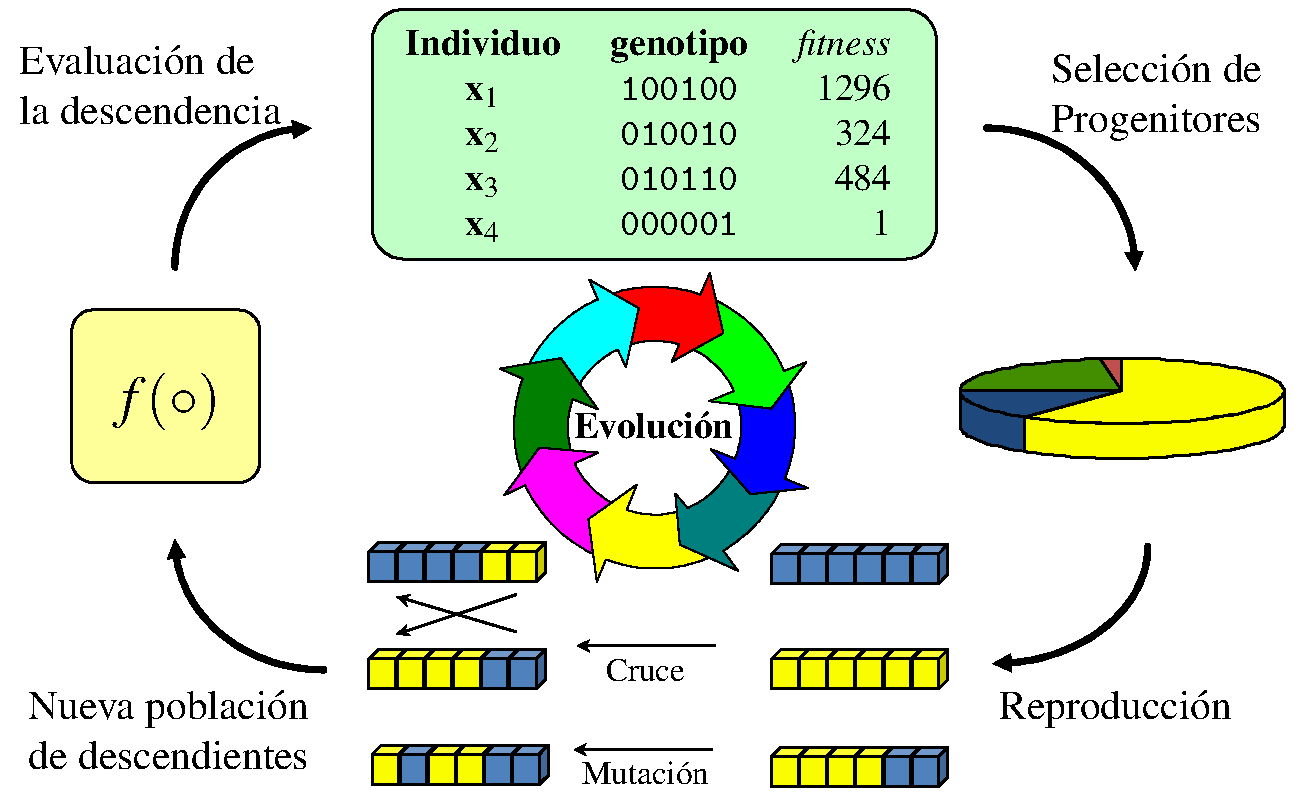
</div>

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

### 1. Haz una clase Item que sólo tenga atributos de instancia:
* Item = nombre de la clase
* id = Serà el id del objeto
* weight = el peso del objeto
* value = el valor del objeto

Esta clase simboliza un objeto con sus atributos.

In [2]:
class Item:
    def __init__(self, id, weigth, value):
        self.id = id
        self.weigth = weigth
        self.value = value

In [3]:
mochila = Item('mochila nico', 40, 50)
mochila.id

'mochila nico'

### 2. Declara un numero de productos (20) y haz 3 listas ( o numpy arrays):
* n = 20
* ids = con ids de 0 a $n$
* weights = con $n$ numeros aleatorios entre a y b (4,9)
* values = con $n$ numeros aleatorios entre c y d (10,30)

In [4]:
n=20
ids = np.arange(n)
weights = np.random.randint(4,9,n)
values = np.random.randint(10,30,n)

### 3. declara una lista vacía y rellenala con los los objetos de la clase Item para cada Item
nombre de la lista = item_list

In [5]:
item_list = []
for i in range(n):
    objeto = Item(ids[i], weights[i], values[i])
    item_list.append(objeto)
item_list

In [6]:
item_list[0].value

13

# Estos datos son los que determinan el problema

In [7]:
# Peso maximo de la mochila
carrier_limit = 40.0  # kg

# Parametros para el algoritmo genetico 
population_size = 10
generation_size = 100
mutation_rate = 0.1

### 4. Crea una función que reciva la lista de items y devuelva una solución aleatoria al problema ( no tiene por que ser factible)
Una solucion para un problema de 4 objetos seria de la forma: [0,1,0,1], donde los objetos con ids 1 y 3 entrarian a la mochila y el 0 y 2 no

Nombre: create_random_solution

Nota: hay que utilizar funciones random que generen vectores aleatorios de 0 y 1

In [8]:
def create_random_solution(lista_items):
    solution = np.random.randint(0,2,len(lista_items))
    return solution
sol1 = create_random_solution(item_list)
sol2 = create_random_solution(item_list)

### 5. Función que calcule el valor de una posible solución, esta función recive la lista de items y  una solución
#### Recive: lista de items y solución
Nombre: calculate_value
#### Devuelve: valor numerico de la solucion (suma de valores de los items)

In [9]:
def create_value(solucion, item_list):
    suma = 0
    for i in range(len(item_list)):
        if solucion[i] == 1:
            suma += item_list[i].value
    return suma

In [10]:
create_value(sol1, item_list)

140

In [11]:
def create_weigth(solucion, item_list):
    suma = 0
    for i in range(len(item_list)):
        if solucion[i] == 1:
            suma += item_list[i].weigth
    return suma
create_weigth(sol1, item_list)

43

### 6. Haz una función que reciva la lista de items, una solución y el peso màximo y te devuelva True si es una solución factible y False si no lo es
Nombre: valid_solution
#### Devuelve: True o False

In [12]:
def valid_solution(item_list, solucion, pesomax):
    if create_weigth(solucion, item_list) <= pesomax:
        return True
    else:
        return False
valid_solution(item_list, sol1, carrier_limit)

False

### 7. Función que mire si dos soluciones son iguales
#### Recive: solucion1 y solucion2
Nombre: check_duplicate_solutions

#### Devuelve: True or False

In [13]:
def check_duplicate_solutions(sol1, sol2):
    for i in range(len(sol1)):
        if sol1[i] != sol2[i]:
            return False
    return True
check_duplicate_solutions(sol1,sol2)

False

### 8. Función que genere una población inicial (conjunto de soluciones aleatorias inicial)
#### Recive: 
* pop_size = tamaño de la población (numero de soluciones)
* item_list = la lista de objetos items
* peso máximo

#### Devuelve una lista de soluciones

Nombre: initial_population

Nota: La función debe asegurarse que hay un pop_size de soluciones diferentes que sean validas. Las soluciones deben generarse de forma aleatoria

In [36]:
def initial_population(pop_size, item_list, carrier_limit):
    contador = 0
    lista_soluciones = []

    while len(lista_soluciones) < pop_size:
        contador2=0
        solucion_posible = create_random_solution(item_list)
        if valid_solution(item_list, solucion_posible, carrier_limit):
            for i in lista_soluciones:
                if check_duplicate_solutions(i, solucion_posible):
                    contador2+=1
            if contador2 == 0:
                lista_soluciones.append(solucion_posible)
                contador +=1

    return lista_soluciones
pop = initial_population(10, item_list, carrier_limit) 
pop

[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]),
 array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]),
 array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])]

### 9. Función que escoja 2 soluciones de forma aleatoria y escoja la mejor

Tiene que generar 2 indices de forma aleatoria
#### Recive: 
* pop = población (conjunto de soluciones)
* item_list

#### Devuelve una solucion

Nombre: tournament_selection


In [29]:
def tournament_selection(pop, item_list):
    v=1
    while v == 1:
        n1 = pop[np.random.randint(0, len(pop))]
        n2 = pop[np.random.randint(0, len(pop))]
        if check_duplicate_solutions(n1, n2):
            v = 1
        else:
            v=2
    if create_value(n1, item_list) > create_value(n2, item_list):
        return n1
    elif create_value(n1, item_list) < create_value(n2, item_list):
        return n2
    else:
        if create_weigth(n1, item_list) > create_weigth(n2, item_list):
            return n2
        else:
            return n1
sol1 = tournament_selection(pop, item_list)
sol2 = tournament_selection(pop, item_list)
sol1

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

### 10. Función que junta 2 soluciones de forma aleatoria (reproducción)
#### Recive: 
* 2 soluciones
* item_list
* carrier_limit

#### Devuelve una solucion

Nombre: crossover

Nota: Función recursiva. Hay que escojer un punto de corte de forma aleatoria ( es decir un indice y juntar por ese indice. Hay que mirar si la solución generada es valida, si no hay que volver a llamar la misma función


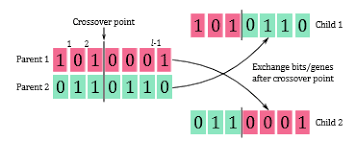

In [37]:
def crossover(sol1, sol2, item_list, carrier_limit):
    n = np.random.randint(len(item_list))
    cross = np.concatenate((sol1[n:], sol2[:n]))
    if valid_solution(item_list, cross, carrier_limit):
        return cross
    else:
        return crossover(sol1, sol2, item_list, carrier_limit)
        
sol_cross=crossover(sol1, sol2, item_list, carrier_limit)

### 11. Función que muta una solución (escojera dos indices de forma aleatoria de la solución y pondrá 1 o 0 de forma aleatoria)
#### Recive: 
* 1 solucion
* item_list
* carrier_limit

#### Devuelve una solucion

Nombre: mutation

Nota: Función recursiva. Hay que escojer 2 indices y cambiar los valores de esa solucion. Hay que mirar si la solución generada es valida, si no hay que volver a llamar la misma función.


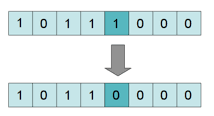


In [32]:
def mutation(sol, item_list, carrier_limit):
    sol_res=sol.copy()
    v = 1
    while v == 1:
        n1 = np.random.randint(len(item_list))
        n2 = np.random.randint(len(item_list))
        if n1 == n2:
            v = 1
        else:
            v=2
    sol_res[n1], sol_res[n2] = sol_res[n2], sol_res[n1]
    
    if valid_solution(item_list, sol_res, carrier_limit):
        return sol_res
    else:
        return mutation(sol, item_list, carrier_limit)
mutation(sol1, item_list, carrier_limit)  

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

### 12. Función que genera $n$ nuevas soluciones a partir de las anteriores

Esta función empieza con una lista vacia, y va rellenandola de nuevas soluciones, para eso itera len(pop) veces:
1. Escoje 2 soluciones de la población de entrada de la función (como padres)
2. Junta con crossover estas dos soluciones
3. Se tira una moneda uniforme entre 0 y 1, si es mayor que mut_rate, se muta la solución anterior si no se omite el paso
4. Se añade a la lista de nuevas soluciones
#### Recive: 
* pop
* mut_rate
* item_list
* carrier_limit

#### Devuelve una nueva población (conjunto de soluciones)

Nombre: create_generation

Nota: 


In [55]:
def create_generation(pop, mut_rate, item_list, carrier_limit):
    new_pop=[]
    for i in range(len(pop)):
        sol1 = tournament_selection(pop, item_list)
        sol2 = tournament_selection(pop, item_list)
        while not check_duplicate_solutions(sol1, sol2):
            sol1 = tournament_selection(pop, item_list)
            sol2 = tournament_selection(pop, item_list)
    
        sol = crossover(sol1, sol2, item_list, carrier_limit)
        n= np.random.random()
        if n > mut_rate:
            sol=mutation(sol, item_list, carrier_limit)
        else:
            sol = sol
        new_pop.append(sol)
    return new_pop
new_pop=create_generation(pop, mutation_rate, item_list, carrier_limit)
    

### 13. Función que obtiene el valor de la mejor solución de una población

#### Recive: 
* pop
* item_list

#### Devuelve un valor

Nombre: best_solution

Nota: 


In [57]:
def best_solution(pop, item_list):
    best_sol = pop[0]
    for i in pop:
        if create_value(i, item_list)>create_value(best_sol, item_list):
            best_sol = i
        elif create_value(i, item_list)==create_value(best_sol, item_list):
            if create_weigth(i, item_list)<create_value(best_sol, item_list):
                best_sol = i
    return best_sol
best_solution(pop, item_list)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

### 14. Algoritmo genetico

Esta función itera utilizando la función create_generation. 
* 1º incializa una población inicial
* 2º Inicializa dos listas vacias (1 para la mejor población de cada generación y otra para el valors asociado a esa solución)
* 3º Itera utilizando la función create_generation gen_size veces y creando generaciones de poblaciones a partir de la anterior y en cada iteración escoje la mejor solucion para guardar su información

#### Recive: 
* genetic_algorithm(carrier_limit, p_size, gen_size, mutation_rate, item_list)

#### Devuelve una lista con las mejores soluciones de cada generación y una lista de mejores resultados por generación

Nombre: genetic_algorithm

Nota: 


In [58]:
def genetic_algorithm(carrier_limit, p_size, gen_size, mutation_rate, item_list):
    pop = initial_population(p_size, item_list, carrier_limit)
    best_pop = []
    best_valor = []
    for i in range(gen_size):
        new_pop = create_generation(pop, mutation_rate, item_list, carrier_limit)
        best_sol = best_solution(new_pop, item_list)
        best_pop.append(best_sol)
        best_valor.append(create_value(best_sol, item_list))
    return best_pop, best_valor

In [59]:
# latest population after genetic algorithm run
latest_pop, v_list = genetic_algorithm(carrier_limit=carrier_limit,
                                       p_size=population_size,
                                       gen_size=generation_size,
                                       mutation_rate=mutation_rate,
                                       item_list=item_list)

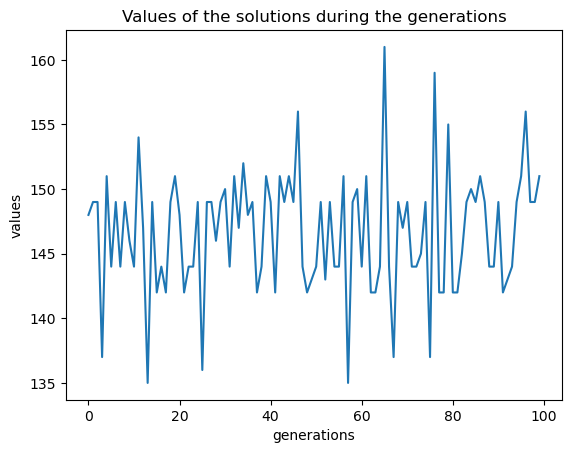

In [60]:
# Plot a graph to show the progress
plt.plot(v_list)
plt.xlabel('generations')
plt.ylabel('values')
plt.title("Values of the solutions during the generations")
plt.show()